# 第6章 教師あり学習: 分類

## 6.1 1次元入力2クラス分類

### 6.1.1 問題設定

In [1]:
# リスト 6-1-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 ----------
np.random.seed(seed=0)             # 乱数を固定
X_min, X_max = 0, 2.5              # x の上限と下限（表示用）
N = 30                             # データ数
col = ["cornflowerblue", "gray"]   # クラス0と1の表示色
X = np.zeros(N)                    # 空のXを準備
T = np.zeros(N, dtype=np.uint8)    # 空のTを準備
prm_s = [0.4, 0.8]                 # クラス0と1の分布の開始地点
prm_w = [0.8, 1.6]                 # クラス0と1の分布の幅
prm_pi = 0.5                       # クラス0の全体に対する比率
for n in range(N):
    r = np.random.rand()
    T[n] = 0 * (r < prm_pi) + 1 * (r >= prm_pi)          # (A)
    X[n] = prm_s[T[n]] + np.random.rand() * prm_w[T[n]]  # (B)
# データ表示
print("X =", np.round(X, 2))
print("T =", T)

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


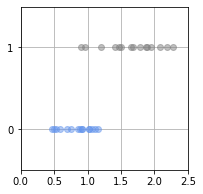

In [2]:
# リスト 6-1-(2)
# データ分布表示 ----------
def show_data1d(x, t):
    for k in range(2):  # (A) k=0、1 のループ
        plt.plot(       # (B) 分布を表示
            x[t == k], t[t == k], col[k],
            alpha=0.5, linestyle="none", marker="o",
        )
    plt.xticks(np.arange(0, 3, 0.5))
    plt.yticks([0, 1])
    plt.xlim(X_min, X_max)
    plt.ylim(-0.5, 1.5)

# メイン ----------
fig = plt.figure(ﬁgsize=(3, 3))
show_data1d(X, T)
plt.grid()
plt.show()

### 6.1.2 確率で表すクラス分類

### 6.1.3 最尤推定

### 6.1.4 ロジスティック回帰モデル

In [3]:
# リスト 6-1-(3)
# ロジスティック回帰モデル ----------
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))  # 式6-10
    return y

decision boundary = 1.25


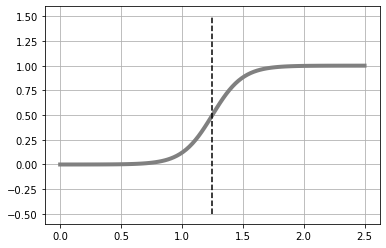

In [4]:
# リスト 6-1-(4)
# ロジスティック回帰モデルの表示 ----------
def show_logistic(w):
    x = np.linspace(X_min, X_max, 100)
    y = logistic(x, w)
    plt.plot(x, y, "gray", linewidth=4)
    # 決定境界
    i = np.min(np.where(y > 0.5))     # (A)
    boundary = (x[i - 1] + x[i]) / 2  # (B)
    plt.plot([boundary, boundary], [-0.5, 1.5], "black", linestyle="--")
    return boundary

# テスト ----------
w = np.array([8, -10])
b = show_logistic(w)
print(f'decision boundary = {b}')
plt.grid()
plt.show()

### 6.1.5 交差エントロピー誤差

In [5]:
# リスト 6-1-(5)
# 平均交差エントロピー誤差 ----------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    # 式6-16の計算
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / N
    return cee

# テスト ----------
w = np.array([1, 1])
cee = cee_logistic(w, X, T)
print(f"CEE = {cee:.6f}")

CEE = 1.028819


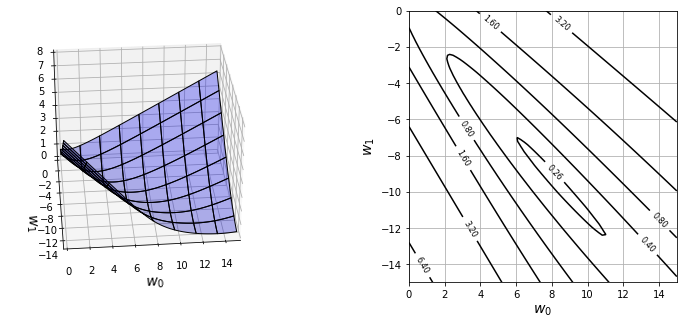

In [6]:
# リスト 6-1-(6)
# 平均交差エントロピー誤差の計算 ----------
w0_n, w1_n = 80, 80  # 等高線表示の解像度
w0_min, w0_max = 0, 15
w1_min, w1_max = -15, 0
w0 = np.linspace(w0_min, w0_max, w0_n)
w1 = np.linspace(w1_min, w1_max, w1_n)
C = np.zeros((w1_n, w0_n))
for i0 in range(w0_n):
    for i1 in range(w1_n):
        w = np.array([w0[i0], w1[i1]])
        C[i1, i0] = cee_logistic(w, X, T)  # CEEを計算
ww0, ww1 = np.meshgrid(w0, w1)  # 描画用座標の作成

# グラフ描画 ----------
plt.ﬁgure(ﬁgsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
# サーフェス表示
ax = plt.subplot(1, 2, 1, projection="3d")
ax.plot_surface(
    ww0, ww1, C,
    color="blue", edgecolor="black", rstride=10, cstride=10, alpha=0.3,
)
ax.set_xlabel("$w_0$", fontsize=14)
ax.set_ylabel("$w_1$", fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)
# 等高線表示
plt.subplot(1, 2, 2)
cont = plt.contour(
    ww0, ww1, C,
    colors="black", levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4],
)
cont.clabel(fmt="%.2f", fontsize=8)
plt.xlabel("$w_0$", fontsize=14)
plt.ylabel("$w_1$", fontsize=14)
plt.grid()
plt.show()

### 6.1.6 学習則の導出

In [7]:
# リスト 6-1-(7)
# 平均交差エントロピー誤差の微分 ----------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    # 式6-32、式6-33の計算
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / N
    return dcee

# テスト ----------
w = np.array([1, 1])
dcee = dcee_logistic(w, X, T)
print("dCEE =", np.round(dcee, 6))

dCEE = [0.308579 0.394855]


### 6.1.7 勾配法による解

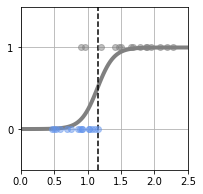

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


In [8]:
# リスト 6-1-(8)
from scipy.optimize import minimize

# ロジスティック回帰モデルのパラメータ最適化
def fit_logistic(w_init, x, t):
    res = minimize(  # (A)
        cee_logistic, w_init, args=(x, t),
        jac=dcee_logistic, method="CG",
    )
    return res.x

# メイン ----------
w_init = np.array([1.0, -1.0])  # wの初期値
w = fit_logistic(w_init, X, T)  # wを計算
cee = cee_logistic(w, X, T)     # CEEを計算

# グラフ描画 ----------
plt.figure(figsize=(3, 3))
boundary = show_logistic(w)
show_data1d(X, T)
plt.grid()
plt.show()

# 結果表示 ----------
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}")
print(f"CEE = {cee:.2f}")
print(f"Boundary = {boundary:.2f} g")

## 6.2 2次元入力2クラス分類

### 6.2.1 問題設定

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
# リスト 6-2-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 ----------
np.random.seed(seed=1)  # 乱数を固定
N = 100                 # データの数
K = 3                   # 分布の数
T3 = np.zeros((N, 3), dtype=int)
T2 = np.zeros((N, 2), dtype=int)
X = np.zeros((N, 2))    # 今までのX0とX1を統合してXで表す
X0_min, X0_max = -3, 3  # X0 の範囲、表示用
X1_min, X1_max = -3, 3  # X1 の範囲、表示用
prm_mu = np.array([[-0.5, -0.5], [0.5, 1.0], [1, -0.5]])  # 分布の中心
prm_sig = np.array([[0.7, 0.7], [0.8, 0.3], [0.3, 0.8]])  # 分布の分散
prm_pi = np.array([0.4, 0.8, 1])  # (A) 各分布への割合を決めるパラメータ
# 3クラス用のラベル"T3"を作成
for n in range(N):         # 各データのループ
    r = np.random.rand()
    for k in range(K):     # (B) 各クラスのループ
        if r < prm_pi[k]:  # クラスを決める
            T3[n, k] = 1
            break          # クラスが決まったらkのループから抜ける
    for k in range(2):     # (C) 決まったT3に対して2次元のXを作成
        X[n, k] = \
            np.random.randn() * prm_sig[T3[n, :] == 1, k] \
            + prm_mu[T3[n, :] == 1, k]
# 2クラス用のラベル"T2"を作成
T2[:, 0] = T3[:, 0]
# T3のクラス1と2をまとめてT2のクラス1とする
T2[:, 1] = T3[:, 1] | T3[:, 2]

In [11]:
# リスト 6-2-(2)
print(X[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [12]:
# リスト 6-2-(3)
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [13]:
# リスト 6-2-(4)
print(T3[:5, :])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


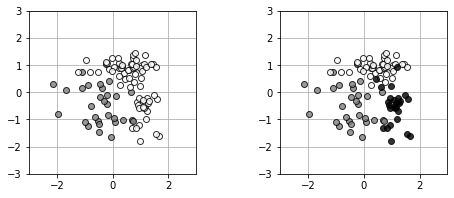

In [14]:
# リスト 6-2-(5)
# データ表示 ----------
def show_data2d(x, t):
    K = t.shape[1]  # tの列数からクラス数を取得
    col = ["gray", "white", "black"]
    for k in range(K):
        plt.plot(
            x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], col[k],
            marker="o", linestyle="None",
            markeredgecolor="black", alpha=0.8,
        )
        plt.xlim(X0_min, X0_max)
        plt.ylim(X1_min, X1_max)

# メイン ----------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
# 2クラス用データ表示
plt.subplot(1, 2, 1)
show_data2d(X, T2)
plt.grid()
# 3クラス用データ表示
plt.subplot(1, 2, 2)
show_data2d(X, T3)
plt.xlim(X0_min, X0_max)
plt.ylim(X1_min, X1_max)
plt.grid()
plt.show()

### 6.2.2 ロジスティック回帰モデル

In [15]:
# リスト 6-2-(6)
# 2次元ロジスティック回帰モデル ----------
def logistic2(x0, x1, w):
    a = w[0] * x0 + w[1] * x1 + w[2]  # 式6-36
    y = 1 / (1 + np.exp(-a))          # 式6-35
    return y

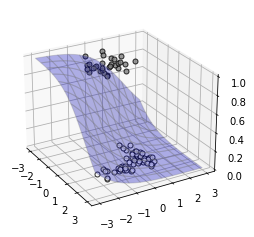

In [16]:
# リスト 6-2-(7)
# 2次元ロジスティック回帰モデルのサーフェス表示 ----------
def show3d_logistic2(ax, w):
    x0_n, x1_n = 50, 50  # サーフェス表示の解像度
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(
        xx0, xx1, y,
        rstride=5, cstride=5, alpha=0.3, color="blue", edgecolor="gray",
    )

# 2次元データの表示 ----------
def show_data2d_3d(ax, x, t):
    col = ["gray", "white"]
    for i in range(2):
        ax.plot(
            x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, col[i],
            marker="o", linestyle="None", markeredgecolor="black",
            markersize=5, alpha=0.8,
        )
    ax.view_init(elev=25, azim=-30)

# テスト ----------
plt.figure(figsize=(5, 4))
ax = plt.subplot(projection="3d")
w = np.array([-1, -1, -1])
show3d_logistic2(ax, w)
show_data2d_3d(ax, X, T2)
plt.show()

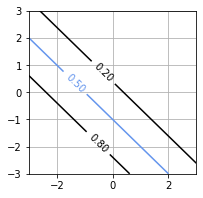

In [17]:
# リスト 6-2-(8)
# 2次元ロジスティック回帰モデルの等高線表示 ----------
def show_contour_logistic2(w):
    x0_n, x1_n = 30, 30  # 等高線表示の解像度
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(
        xx0, xx1, y,
        levels=[0.2, 0.5, 0.8],
        colors=["black", "cornflowerblue", "black"],
    )
    cont.clabel(fmt="%.2f", fontsize=10)
    plt.grid()

# テスト ----------
plt.figure(figsize=(3, 3))
w = np.array([-1, -1, -1])
show_contour_logistic2(w)
plt.show()

In [18]:
# リスト 6-2-(9)
# 交差エントロピー誤差 ----------
def cee_logistic2(w, x, t):  # xはx0とx1を統合したもの
    N = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    # 式6-17の計算
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) 
                     + (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / N
    return cee

In [19]:
# リスト 6-2-(10)
# 交差エントロピー誤差の微分 ----------
def dcee_logistic2(w, x, t):  # xはx0とx1を統合したもの
    N = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    # 式6-37、式6-38、式6-39の計算
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / N
    return dcee

# テスト ----------
w = np.array([-1, -1, -1])
dcee = dcee_logistic2(w, X, T2)
print("dCEE = ", np.round(dcee, 6))

dCEE =  [ 0.10272   0.04451  -0.063072]


w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


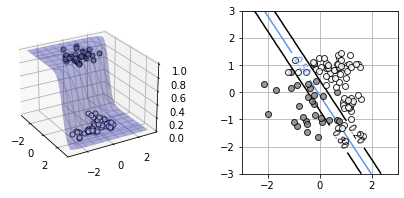

In [20]:
# リスト 6-2-(11)
from scipy.optimize import minimize

# 2次元ロジスティック回帰モデルのパラメータ最適化 ----------
def fit_logistic2(w_init, x, t):
    res = minimize(
        cee_logistic2, w_init, args=(x, t),
        jac=dcee_logistic2, method="CG",
    )
    return res.x

# メイン ----------
w_init = np.array([-1.0, 0.0, 0.0])  # wの初期値
w = fit_logistic2(w_init, X, T2)     # wを計算
cee = cee_logistic2(w, X, T2)        # CEEを計算
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(f"CEE = {cee:.2f}")

# グラフ描画 ----------
plt.figure(figsize=(7, 3))
# サーフェス表示
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection="3d")
show3d_logistic2(ax, w)
show_data2d_3d(ax, X, T2)
# 等高線表示
plt.subplot(1, 2, 2)
show_data2d(X, T2)
show_contour_logistic2(w)
plt.show()

## 6.3 2次元入力3クラス分類

### 6.3.1 3クラス分類ロジスティック回帰モデル

In [21]:
# リスト 6-2-(12)
#  3クラス用ロジスティック回帰モデル ----------
def logistic3(x0, x1, w):
    # x0、x1は長さNのベクトル
    # wは長さ9のベクトル、内部で3x3の行列に変換
    # 出力yはNx3の行列
    N = len(x0)
    K = 3
    w = w.reshape((K, 3))  # 3は、x0、x1、bias の3種から
    y = np.zeros((N, K))
    for k in range(K):
        # 実装では式6-41ではなく式6-40を使用
        a = w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2]
        # 式6-42の各exp(a_k)の計算
        y[:, k] = np.exp(a)
    # 式6-43の計算
    u = np.sum(y, axis=1)
    y = y.T / u  # y.T とすると y[n, k]/u[n] が一度にできる
    y = y.T      # y.T をy にもどす
    return y

# テスト ----------
w = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = logistic3(X[:4, 0], X[:4, 1], w)
print("y = \n", np.round(y, 2))

y = 
 [[0.   0.01 0.99]
 [0.97 0.03 0.  ]
 [0.92 0.07 0.01]
 [0.   0.   1.  ]]


### 6.3.2 交差エントロピー誤差

In [22]:
# リスト 6-2-(13)
# 交差エントロピー誤差 ----------
def cee_logistic3(w, x, t):
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    # 式6-50の計算
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / N
    return cee
    
# テスト ----------
w = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
cee = cee_logistic3(w, X, T3)
print(f"CEE = {cee:.6f}")

CEE = 3.982458


### 6.3.3 勾配法による解

In [23]:
# リスト 6-2-(14)
# 交差エントロピー誤差の微分 ----------
def dcee_logistic3(w, x, t):
    N = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3))  # (クラスの数 K) x (x の次元 D+1)
    N, K = y.shape
    # 式6-51の計算
    for n in range(N):
        for k in range(K):
            x_add1 = np.r_[x[n, :], 1]
            dcee[k, :] = dcee[k, :] + (y[n, k] - t[n, k]) * x_add1
    dcee = dcee / N
    return dcee.reshape(-1)

# テスト ----------
w = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
dcee = dcee_logistic3(w, X, T3)
print("dCEE =", np.round(dcee, 6))

dCEE = [ 0.037784  0.037081 -0.184185 -0.212352 -0.444081 -0.383408  0.174568
  0.407     0.567593]


In [24]:
# リスト 6-2-(15)
# 3クラス用ロジスティック回帰モデルのパラメータ最適化
def fit_logistic3(w_init, x, t):
    res = minimize(
        cee_logistic3, w_init, args=(x, t),
        jac=dcee_logistic3, method="CG",
    )
    return res.x

In [25]:
# リスト 6-2-(16)
# モデル等高線表示 ----------
def show_contour_logistic3(w):
    K = 3  # クラス数
    x0_n, x1_n = 30, 30  # 等高線表示の解像度
    # 表示データの計算
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((x1_n, x0_n, 3))
    for i0 in range(x0_n):  # xx0、xx1 の各列でループ
        # xx0、xx1 の各行に対する3クラス分の値を一度に計算
        y_column = logistic3(xx0[:, i0], xx1[:, i0], w)
        for k in range(K):
            y[:, i0, k] = y_column[:, k]  # 結果をyに格納
    # グラフ描画
    for k in range(K):
        cont = plt.contour(
            xx0, xx1, y[:, :, k],
            levels=[0.5, 0.9], colors=["cornflowerblue", "black"],
        )
        cont.clabel(fmt="%.2f", fontsize=9)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


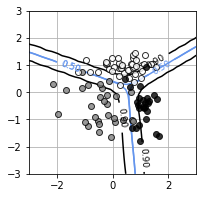

In [26]:
# リスト 6-2-(17)
# メイン ----------
w_init = np.zeros((3, 3))         # wの初期値
w = fit_logistic3(w_init, X, T3)  # wを計算
cee = cee_logistic3(w, X, T3)     # CEEを計算
# 結果表示
print(np.round(w.reshape((3, 3)), 2))
print(f"CEE = {cee:.2f}")

# グラフ描画 ----------
plt.figure(figsize=(3, 3))
show_data2d(X, T3)
show_contour_logistic3(w)
plt.grid()
plt.show()